In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('Test.csv',low_memory= False)

In [7]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES


In [8]:
df.drop('pais_residencia', axis =1, inplace = True)
df.drop('sexo', axis =1, inplace = True)
df.drop('ind_nuevo', axis =1, inplace = True)
df.drop('antiguedad', axis =1, inplace = True)
df.drop('conyuemp', axis =1, inplace = True)
df.drop('indresi', axis =1, inplace = True)
df.drop('indext', axis =1, inplace = True)
df.drop('ncodpers', axis =1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ind_empleado           929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   fecha_alta             929615 non-null  object 
 4   indrel                 929615 non-null  int64  
 5   ult_fec_cli_1t         1683 non-null    object 
 6   indrel_1mes            929592 non-null  float64
 7   tiprel_1mes            929592 non-null  object 
 8   canal_entrada          927534 non-null  object 
 9   indfall                929615 non-null  object 
 10  tipodom                929615 non-null  int64  
 11  cod_prov               925619 non-null  float64
 12  nomprov                925619 non-null  object 
 13  ind_actividad_cliente  929615 non-null  int64  
 14  renta                  929615 non-nu

In [10]:
df.rename({"fecha_dato": "data_Partition" ,"ind_empleado":"employee_Index","fecha_alta":"customer_Registration","indrel":"primary_Status","ult_fec_cli_1t":"Last_primary_status","indrel_1mes":"type_of_owner","tiprel_1mes":"relation_type","canal_entrada":"channel_used","indfall":"deceased_index","tipodom":"primary_adrss","cod_prov":"prov_code","nomprov":"prov_name","ind_actividad_cliente":"activity_index","renta":"gross_income","segmento":"segmentation"}, axis =1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_Partition         929615 non-null  object 
 1   employee_Index         929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   customer_Registration  929615 non-null  object 
 4   primary_Status         929615 non-null  int64  
 5   Last_primary_status    1683 non-null    object 
 6   type_of_owner          929592 non-null  float64
 7   relation_type          929592 non-null  object 
 8   channel_used           927534 non-null  object 
 9   deceased_index         929615 non-null  object 
 10  primary_adrss          929615 non-null  int64  
 11  prov_code              925619 non-null  float64
 12  prov_name              925619 non-null  object 
 13  activity_index         929615 non-null  int64  
 14  gross_income           929615 non-nu

In [12]:
df['deceased_index']= df['deceased_index'].replace("S","Yes").replace("N","No")
df['deceased_index'].value_counts()

deceased_index
No     927215
Yes      2400
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_Partition         929615 non-null  object 
 1   employee_Index         929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   customer_Registration  929615 non-null  object 
 4   primary_Status         929615 non-null  int64  
 5   Last_primary_status    1683 non-null    object 
 6   type_of_owner          929592 non-null  float64
 7   relation_type          929592 non-null  object 
 8   channel_used           927534 non-null  object 
 9   deceased_index         929615 non-null  object 
 10  primary_adrss          929615 non-null  int64  
 11  prov_code              925619 non-null  float64
 12  prov_name              925619 non-null  object 
 13  activity_index         929615 non-null  int64  
 14  gross_income           929615 non-nu

In [14]:
print("Values:  ")
print(df['data_Partition'].value_counts())
print("Null Values: ")
print(df[['data_Partition']].isnull().any())

Values:  
data_Partition
2016-06-28    929615
Name: count, dtype: int64
Null Values: 
data_Partition    False
dtype: bool


In [15]:
print("Values: ")
print(df['employee_Index'].value_counts())
print("Null Values: ")
print(df[['employee_Index']].isnull().any())

Values: 
employee_Index
N    929096
B       218
F       152
A       148
S         1
Name: count, dtype: int64
Null Values: 
employee_Index    False
dtype: bool


In [16]:
print( "Values: ")
print(df['age'].value_counts())
print("Null Values: ")
print(df[['age']].isnull().any())

Values: 
age
24     50706
23     49604
22     47674
21     46322
25     41429
       ...  
114        6
117        1
164        1
118        1
127        1
Name: count, Length: 118, dtype: int64
Null Values: 
age    False
dtype: bool


In [17]:
print(" Values: ")
print(df['customer_Registration'].value_counts())
print("Null Values: ")
print(df[['customer_Registration']].isnull().any())

 Values: 
customer_Registration
2014-07-28    3421
2014-10-03    3355
2014-08-04    2787
2013-10-14    2633
2013-08-03    2013
              ... 
2013-06-15       1
2012-04-29       1
2014-12-13       1
2014-04-26       1
2013-09-22       1
Name: count, Length: 6750, dtype: int64
Null Values: 
customer_Registration    False
dtype: bool


In [18]:
print(" Values: ")
print(df['primary_Status'].value_counts())
print("Null Values: ")
print(df[['primary_Status']].isnull().any())

 Values: 
primary_Status
1     927932
99      1683
Name: count, dtype: int64
Null Values: 
primary_Status    False
dtype: bool


In [19]:
print(" Values: ")
print(df['Last_primary_status'].value_counts())
print("Null Values: ")
print(df[['Last_primary_status']].isnull().any())

 Values: 
Last_primary_status
2016-06-01    138
2016-06-10    133
2016-06-03    110
2016-06-07    102
2016-06-06    101
2016-06-13     84
2016-06-20     84
2016-06-17     78
2016-06-15     78
2016-06-23     78
2016-06-14     76
2016-06-02     75
2016-06-09     75
2016-06-22     72
2016-06-21     70
2016-06-24     64
2016-06-16     62
2016-06-08     60
2016-06-27     58
2016-06-28     49
2016-06-29     36
Name: count, dtype: int64
Null Values: 
Last_primary_status    True
dtype: bool


In [20]:
print(" Values: ")
print(df['type_of_owner'].value_counts())
print("Null Values: ")
print(df[['type_of_owner']].isnull().any())

 Values: 
type_of_owner
1.0    929565
3.0        27
Name: count, dtype: int64
Null Values: 
type_of_owner    True
dtype: bool


In [21]:
print(" Values: ")
print(df['relation_type'].value_counts())
print("Null Values: ")
print(df[['relation_type']].isnull().any())

 Values: 
relation_type
I    535943
A    393622
P        27
Name: count, dtype: int64
Null Values: 
relation_type    True
dtype: bool


In [22]:
print(" Values: ")
print(df['channel_used'].value_counts())
print("Null Values: ")
print(df[['channel_used']].isnull().any())

 Values: 
channel_used
KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
        ...  
KDB         1
KHR         1
KGN         1
025         1
KDL         1
Name: count, Length: 162, dtype: int64
Null Values: 
channel_used    True
dtype: bool


In [23]:
print(" Values: ")
print(df['deceased_index'].value_counts())
print("Null Values: ")
print(df[['deceased_index']].isnull().any())

 Values: 
deceased_index
No     927215
Yes      2400
Name: count, dtype: int64
Null Values: 
deceased_index    False
dtype: bool


In [24]:
print(" Values: ")
print(df['primary_adrss'].value_counts())
print("Null Values: ")
print(df[['primary_adrss']].isnull().any())

 Values: 
primary_adrss
1    929615
Name: count, dtype: int64
Null Values: 
primary_adrss    False
dtype: bool


In [25]:
print(" Values: ")
print(df['prov_code'].value_counts())
print("Null Values: ")
print(df[['prov_code']].isnull().any())

 Values: 
prov_code
28.0    298250
8.0      88579
46.0     47996
41.0     40492
15.0     28715
30.0     27752
29.0     24546
50.0     23160
3.0      22147
11.0     19795
36.0     18961
33.0     18300
35.0     16332
47.0     16018
6.0      12936
45.0     12658
48.0     12494
18.0     12392
37.0     11071
39.0     10824
14.0      9831
7.0       9130
10.0      8598
13.0      8075
21.0      8018
2.0       7780
43.0      7631
12.0      7145
9.0       6645
17.0      6304
31.0      6010
26.0      5806
24.0      5717
27.0      5656
32.0      5605
25.0      5430
38.0      5097
20.0      4869
19.0      4678
23.0      4496
4.0       4307
16.0      3788
49.0      3430
34.0      3311
40.0      2881
22.0      2789
5.0       2628
1.0       2591
44.0      1538
42.0      1261
52.0       643
51.0       513
Name: count, dtype: int64
Null Values: 
prov_code    True
dtype: bool


In [26]:
print(" Values: ")
print(df['deceased_index'].value_counts())
print("Null Values: ")
print(df[['deceased_index']].isnull().any())

 Values: 
deceased_index
No     927215
Yes      2400
Name: count, dtype: int64
Null Values: 
deceased_index    False
dtype: bool


In [27]:
print(" Values: ")
print(df['prov_name'].value_counts())
print("Null Values: ")
print(df[['prov_name']].isnull().any())

 Values: 
prov_name
MADRID                    298250
BARCELONA                  88579
VALENCIA                   47996
SEVILLA                    40492
CORUÑA, A                  28715
MURCIA                     27752
MALAGA                     24546
ZARAGOZA                   23160
ALICANTE                   22147
CADIZ                      19795
PONTEVEDRA                 18961
ASTURIAS                   18300
PALMAS, LAS                16332
VALLADOLID                 16018
BADAJOZ                    12936
TOLEDO                     12658
BIZKAIA                    12494
GRANADA                    12392
SALAMANCA                  11071
CANTABRIA                  10824
CORDOBA                     9831
BALEARS, ILLES              9130
CACERES                     8598
CIUDAD REAL                 8075
HUELVA                      8018
ALBACETE                    7780
TARRAGONA                   7631
CASTELLON                   7145
BURGOS                      6645
GIRONA                 

In [28]:
print(" Values: ")
print(df['activity_index'].value_counts())
print("Null Values: ")
print(df[['activity_index']].isnull().any())

 Values: 
activity_index
0    534276
1    395339
Name: count, dtype: int64
Null Values: 
activity_index    False
dtype: bool


In [29]:
print(" Values: ")
print(df['gross_income'].value_counts())
print("Null Values: ")
print(df[['gross_income']].isnull().any())

 Values: 
gross_income
       NA    227965
451931.22       354
463625.16       111
128318.52        91
181042.20        91
              ...  
 41400.81         1
 47322.18         1
175518.57         1
105938.64         1
111644.01         1
Name: count, Length: 516403, dtype: int64
Null Values: 
gross_income    False
dtype: bool


In [30]:
print(" Values: ")
print(df['segmentation'].value_counts())
print("Null Values: ")
print(df[['segmentation']].isnull().any())

 Values: 
segmentation
02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
Name: count, dtype: int64
Null Values: 
segmentation    True
dtype: bool


In [31]:
df['Last_primary_status'] = df['Last_primary_status'].ffill()
df['Last_primary_status'] = df['Last_primary_status'].bfill()
df['type_of_owner'] = df['type_of_owner'].ffill()
df['relation_type'] = df['relation_type'].ffill()
df['channel_used'] = df['channel_used'].ffill()
df['prov_code'] = df['prov_code'].ffill()
df['prov_name'] = df['prov_name'].ffill()
df['segmentation'] = df['segmentation'].ffill()



In [32]:
df.isnull().sum()

data_Partition           0
employee_Index           0
age                      0
customer_Registration    0
primary_Status           0
Last_primary_status      0
type_of_owner            0
relation_type            0
channel_used             0
deceased_index           0
primary_adrss            0
prov_code                0
prov_name                0
activity_index           0
gross_income             0
segmentation             0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_Partition         929615 non-null  object 
 1   employee_Index         929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   customer_Registration  929615 non-null  object 
 4   primary_Status         929615 non-null  int64  
 5   Last_primary_status    929615 non-null  object 
 6   type_of_owner          929615 non-null  float64
 7   relation_type          929615 non-null  object 
 8   channel_used           929615 non-null  object 
 9   deceased_index         929615 non-null  object 
 10  primary_adrss          929615 non-null  int64  
 11  prov_code              929615 non-null  float64
 12  prov_name              929615 non-null  object 
 13  activity_index         929615 non-null  int64  
 14  gross_income           929615 non-nu

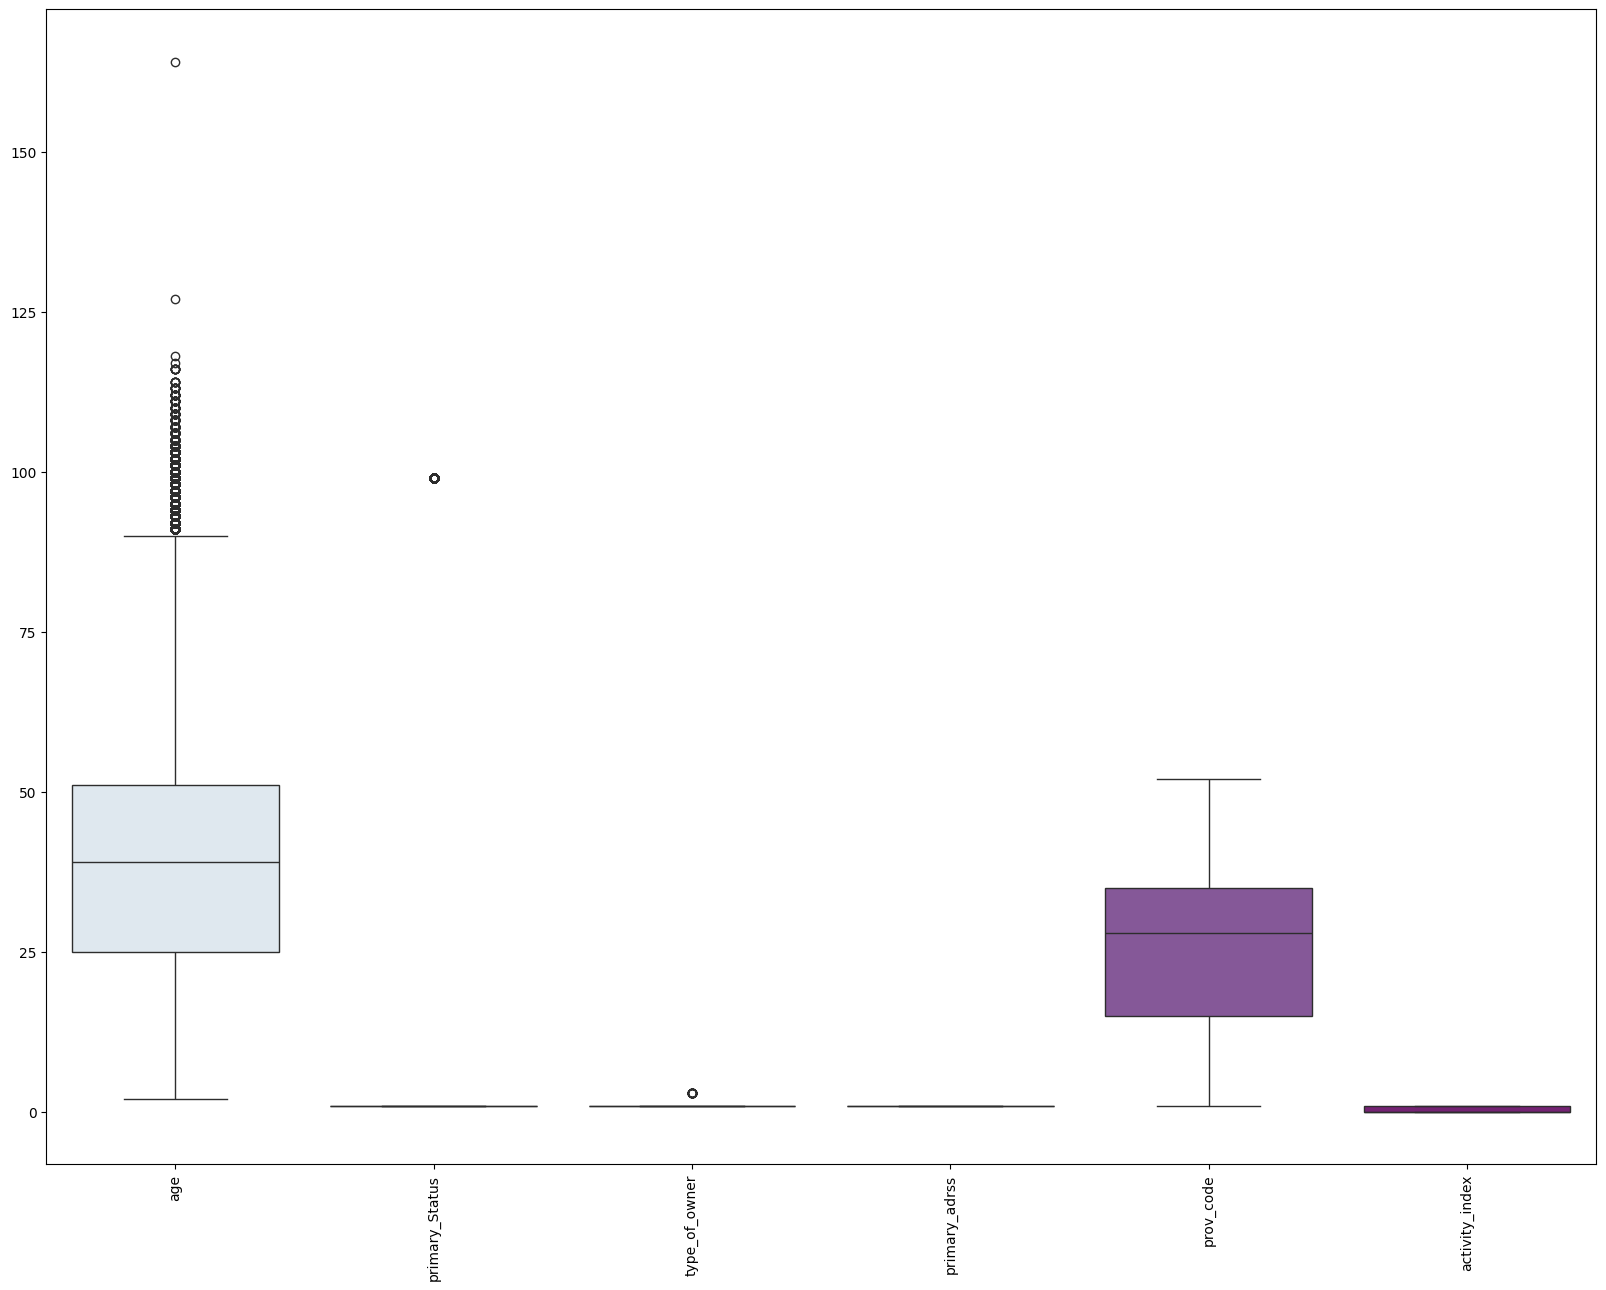

In [34]:
plt.figure(figsize=(20,15))
ax=sns.boxplot(data = df, palette='BuPu')
plt.xticks(rotation=90)

plt.show()

     

WEEK 10 EDA 

In [35]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
929610    False
929611    False
929612    False
929613    False
929614    False
Length: 929615, dtype: bool

In [36]:
df.loc[df.duplicated()]

,data_Partition,employee_Index,age,customer_Registration,primary_Status,Last_primary_status,type_of_owner,relation_type,channel_used,deceased_index,primary_adrss,prov_code,prov_name,activity_index,gross_income,segmentation
11,2016-06-28,N,22,2013-08-28,1,2016-06-03,1.0,I,KHE,No,1,28.0,MADRID,0,NA,03 - UNIVERSITARIO
28,2016-06-28,N,22,2013-08-28,1,2016-06-03,1.0,I,KHE,No,1,8.0,BARCELONA,0,NA,03 - UNIVERSITARIO
52,2016-06-28,N,22,2013-08-28,1,2016-06-03,1.0,I,KHE,No,1,15.0,"CORUÑA, A",0,NA,03 - UNIVERSITARIO
59,2016-06-28,N,22,2013-08-28,1,2016-06-03,1.0,I,KHE,No,1,45.0,TOLEDO,0,NA,03 - UNIVERSITARIO
61,2016-06-28,N,22,2013-08-28,1,2016-06-03,1.0,I,KHE,No,1,45.0,TOLEDO,0,NA,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926394,2016-06-28,N,19,2006-12-15,1,2016-06-09,1.0,I,KAT,No,1,28.0,MADRID,0,216100.83,02 - PARTICULARES
926427,2016-06-28,N,54,2006-12-12,1,2016-06-09,1.0,I,KAH,No,1,32.0,OURENSE,0,67864.32,02 - PARTICULARES
927656,2016-06-28,N,44,2006-12-21,1,2016-06-10,1.0,A,KFA,No,1,28.0,MADRID,1,135400.71,02 - PARTICULARES
928314,2016-06-28,N,45,2006-11-20,1,2016-06-17,1.0,I,KFC,No,1,20.0,GIPUZKOA,0,NA,02 - PARTICULARES


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_Partition         929615 non-null  object 
 1   employee_Index         929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   customer_Registration  929615 non-null  object 
 4   primary_Status         929615 non-null  int64  
 5   Last_primary_status    929615 non-null  object 
 6   type_of_owner          929615 non-null  float64
 7   relation_type          929615 non-null  object 
 8   channel_used           929615 non-null  object 
 9   deceased_index         929615 non-null  object 
 10  primary_adrss          929615 non-null  int64  
 11  prov_code              929615 non-null  float64
 12  prov_name              929615 non-null  object 
 13  activity_index         929615 non-null  int64  
 14  gross_income           929615 non-nu

Text(0, 0.5, 'Values')

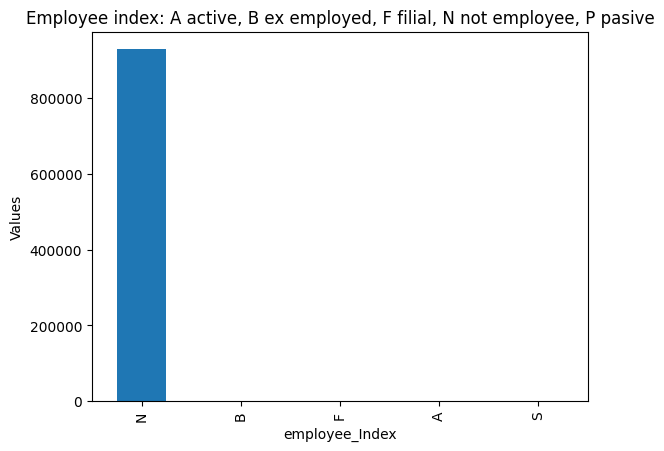

In [38]:
threshold = 1000000
ax= df['employee_Index'].value_counts() \
    .loc[lambda x: x < threshold] \
    .plot(kind='bar',title ="Employee index: A active, B ex employed, F filial, N not employee, P pasive")
ax.set_ylabel("Values")


Text(0, 0.5, 'Values')

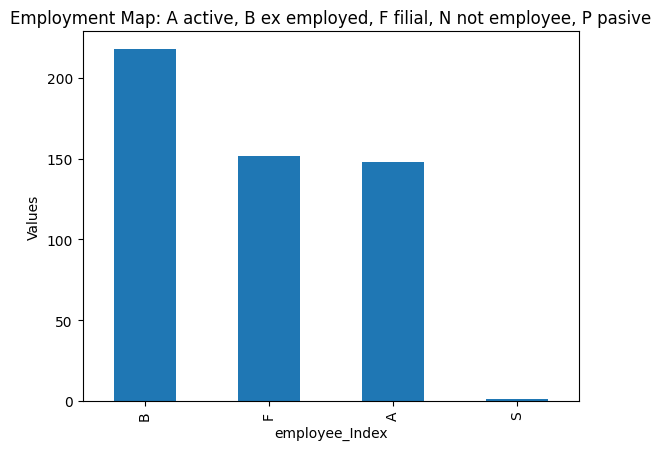

In [39]:
threshold = 10000 
ax = df['employee_Index'].value_counts() \
    .loc[lambda x: x < threshold] \
    .plot(kind='bar', title='Employment Map: A active, B ex employed, F filial, N not employee, P pasive')
ax.set_ylabel("Values")

Text(0, 0.5, 'Values')

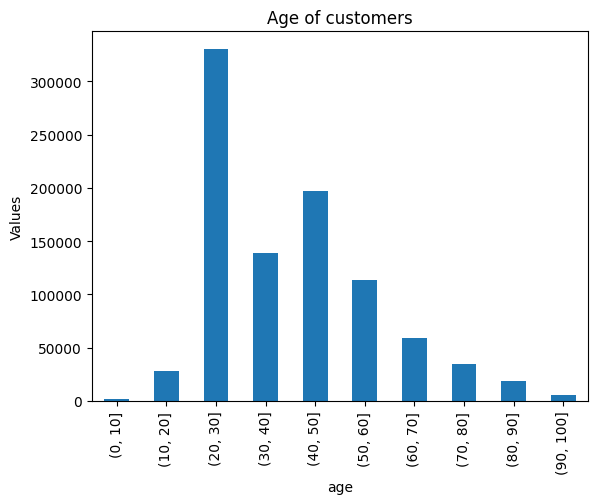

In [40]:
age_bins = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_counts = df['age'].groupby(age_bins).size()
age_counts.plot(kind='bar', title = 'Age of customers')

plt.ylabel('Values')



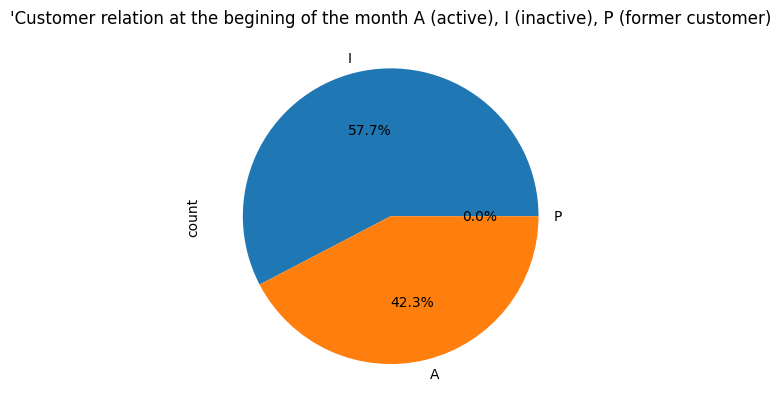

In [41]:
ax = df['relation_type'].value_counts() \
.plot(kind='pie',autopct='%1.1f%%',title="'Customer relation at the begining of the month A (active), I (inactive), P (former customer)")

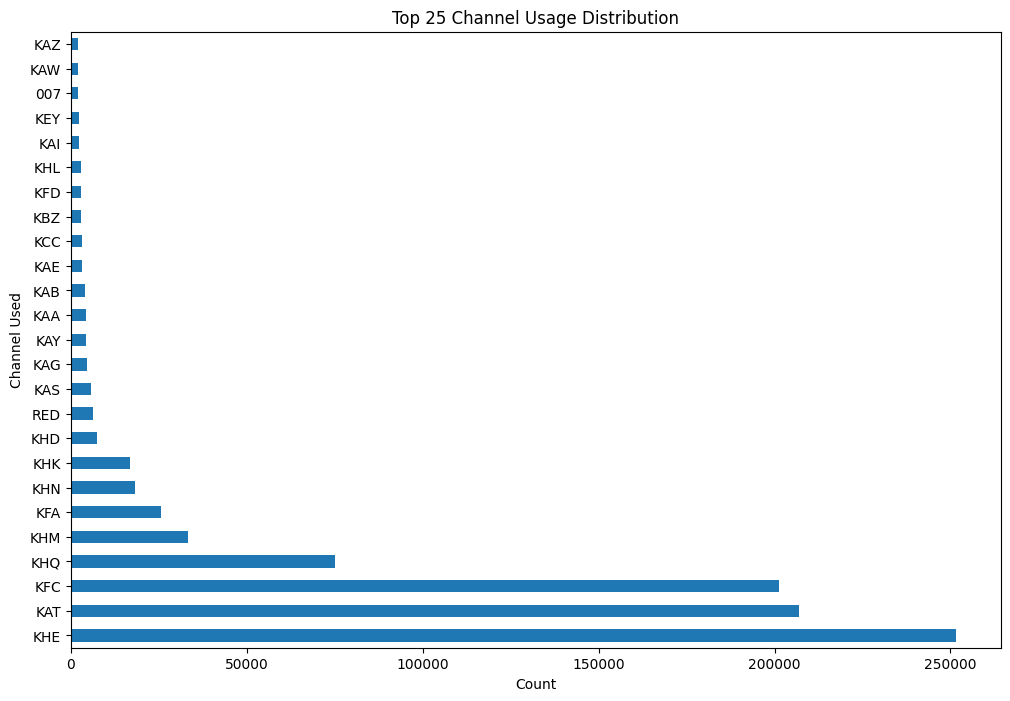

In [42]:

top_n = df['channel_used'].value_counts().head(25)


top_n.plot(kind='barh', figsize=(12, 8))
plt.title('Top 25 Channel Usage Distribution')
plt.xlabel('Count')
plt.ylabel('Channel Used')
plt.show()



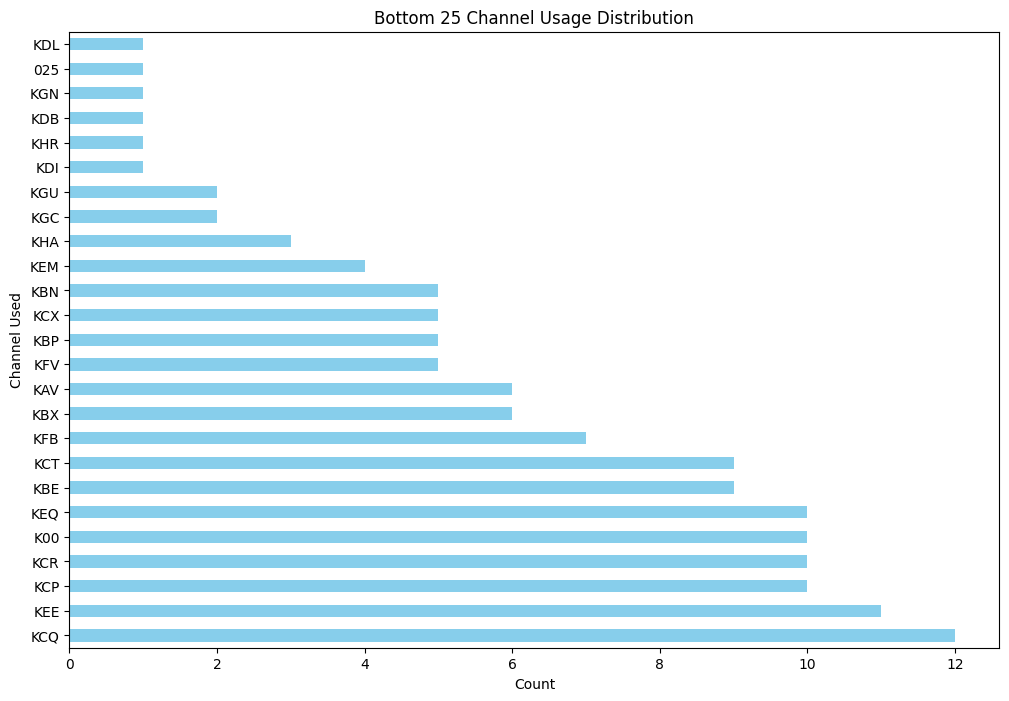

In [43]:

bottom_25 = df['channel_used'].value_counts().tail(25)


bottom_25.plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title('Bottom 25 Channel Usage Distribution')
plt.xlabel('Count')
plt.ylabel('Channel Used')
plt.show()


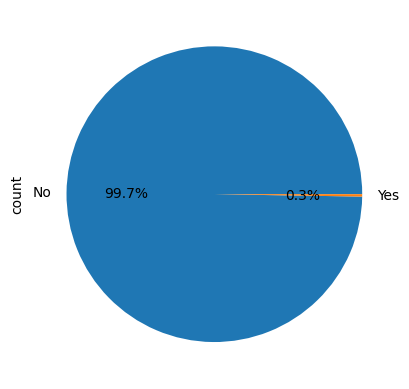

In [44]:
ax = df['deceased_index'].value_counts() \
.plot(kind='pie',autopct='%1.1f%%')

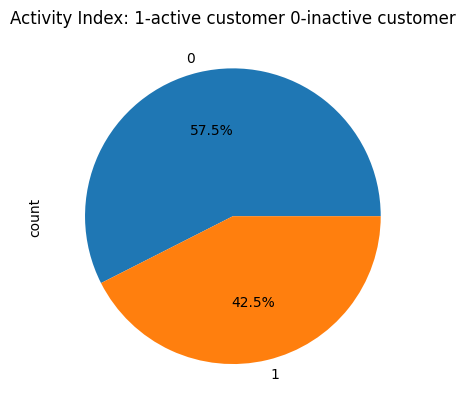

In [45]:
ax = df['activity_index'].value_counts() \
.plot(kind='pie',autopct='%1.1f%%',title="Activity Index: 1-active customer 0-inactive customer")

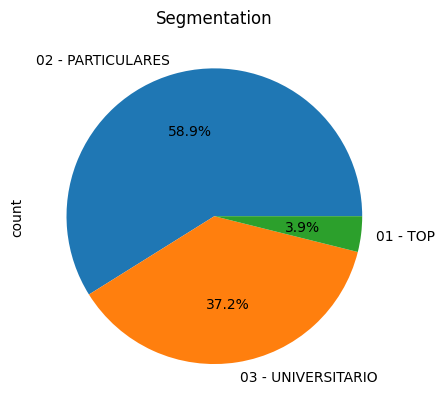

In [46]:
ax = df['segmentation'].value_counts() \
.plot(kind='pie',autopct='%1.1f%%',title="Segmentation")

In [47]:
df['gross_income'] = pd.to_numeric(df['gross_income'], errors='coerce')


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_Partition         929615 non-null  object 
 1   employee_Index         929615 non-null  object 
 2   age                    929615 non-null  int64  
 3   customer_Registration  929615 non-null  object 
 4   primary_Status         929615 non-null  int64  
 5   Last_primary_status    929615 non-null  object 
 6   type_of_owner          929615 non-null  float64
 7   relation_type          929615 non-null  object 
 8   channel_used           929615 non-null  object 
 9   deceased_index         929615 non-null  object 
 10  primary_adrss          929615 non-null  int64  
 11  prov_code              929615 non-null  float64
 12  prov_name              929615 non-null  object 
 13  activity_index         929615 non-null  int64  
 14  gross_income           701650 non-nu

<Axes: xlabel='age', ylabel='gross_income'>

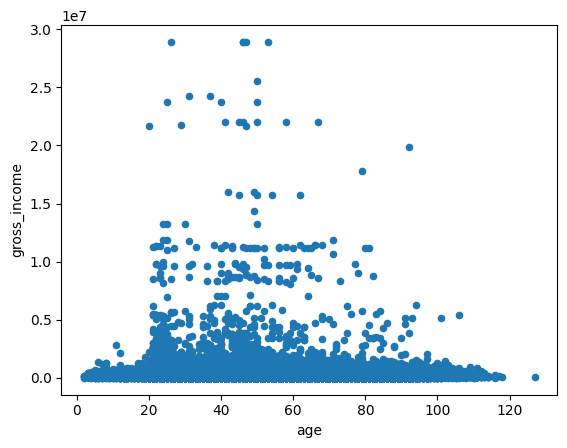

In [49]:
df.plot(kind='scatter',x='age',y='gross_income')

In [50]:
import pandas as pd 
from ydata_profiling import ProfileReport

report= ProfileReport(df)

In [51]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cn_df = df.copy()
cn_df

In [ ]:
X = cn_df.drop(['y'], axis=1)
y = cn_df.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X and Y train shape:", X_train.shape, y_train.shape)
print("X and Y test shape:", X_test.shape, y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
print("\n--- Hyperparameter Tuning for Random Forest ---")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

In [ ]:
rf_grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest: {:.2f}%".format(rf_grid_search.best_score_ * 100))


In [ ]:
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)
rf_pred = best_rf.predict(X_test_scaled)
rf_accuracy = best_rf.score(X_test_scaled, y_test) * 100
print("\nAccuracy of Random Forest classifier on test set: {:.2f}%".format(rf_accuracy))


In [ ]:
rf_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:,1])

In [ ]:
print("\n--- Hyperparameter Tuning for Gradient Boosting ---")
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_grid_search = GridSearchCV(
    estimator=gb,
    param_grid=gb_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

gb_grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best cross-validation accuracy for Gradient Boosting: {:.2f}%".format(gb_grid_search.best_score_ * 100))


In [ ]:
best_gb = gb_grid_search.best_estimator_
best_gb.fit(X_train_scaled, y_train)
gb_pred = best_gb.predict(X_test_scaled)
gb_accuracy = best_gb.score(X_test_scaled, y_test) * 100
print("\nAccuracy of Gradient Boosting classifier on test set: {:.2f}%".format(gb_accuracy))


In [ ]:
gb_cm = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix for Gradient Boosting:\n", gb_cm)
gb_cr = classification_report(y_test, gb_pred)
print("Classification Report for Gradient Boosting:\n", gb_cr)

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_scaled))
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()